In [1]:
import random
import urllib.request
from typing import Any
import json
import emoji
from bs4 import BeautifulSoup
from pymongo import MongoClient
import uuid
from urllib.error import HTTPError
import time
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import unicodedata
import re
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
class ScrappingClassCentral:
    USER_AGENTS = [
        'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.1 Safari/537.36',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2226.0 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.4; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36',
        'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2224.3 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.93 Safari/537.36',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.124 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36',
        'Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36',
        'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36',
        'Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1944.0 Safari/537.36',
        'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.3319.102 Safari/537.36',
        'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2309.372 Safari/537.36',
        'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2117.157 Safari/537.36',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36',
        'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1866.237 Safari/537.36',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.137 Safari/4E423F',
        'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.116 Safari/537.36 Mozilla/5.0 (iPad; U; CPU OS 3_2 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Version/4.0.4 Mobile/7B334b Safari/531.21.10',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1750.517 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1664.3 Safari/537.36',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1664.3 Safari/537.36',
        'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1650.16 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1623.0 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/30.0.1599.17 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.62 Safari/537.36',
        'Mozilla/5.0 (X11; CrOS i686 4319.74.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.57 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.2 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1468.0 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1467.0 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1464.0 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1500.55 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36',
        'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/535.24 (KHTML, like Gecko) Chrome/19.0.1055.1 Safari/535.24',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_2) AppleWebKit/535.24 (KHTML, like Gecko) Chrome/19.0.1055.1 Safari/535.24',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3) AppleWebKit/535.22 (KHTML, like Gecko) Chrome/19.0.1047.0 Safari/535.22',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.21 (KHTML, like Gecko) Chrome/19.0.1042.0 Safari/535.21',
        'Mozilla/5.0 (X11; Linux i686) AppleWebKit/535.21 (KHTML, like Gecko) Chrome/19.0.1041.0 Safari/535.21',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3) AppleWebKit/535.20 (KHTML, like Gecko) Chrome/19.0.1036.7 Safari/535.20',
        'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.2 (KHTML, like Gecko) Chrome/18.6.872.0 Safari/535.2 UNTRUSTED/1.0 3gpp-gba UNTRUSTED/1.0',
        'Mozilla/5.0 (Macintosh; AMD Mac OS X 10_8_2) AppleWebKit/535.22 (KHTML, like Gecko) Chrome/18.6.872',
        'Mozilla/5.0 (X11; CrOS i686 1660.57.0) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.46 Safari/535.19',
        'Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.45 Safari/535.19',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_2) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.45 Safari/535.19',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.45 Safari/535.19',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.166 Safari/535.19',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_5_8) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.151 Safari/535.19',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.19 (KHTML, like Gecko) Ubuntu/11.10 Chromium/18.0.1025.142 Chrome/18.0.1025.142 Safari/535.19',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.11 Safari/535.19',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11',
        'Mozilla/5.0 (X11; Linux i686) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11',
        'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11',
        'Mozilla/5.0 (Windows NT 6.2) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11',
        'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11',
        'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11',
        'Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11',
        'Mozilla/5.0 (Windows NT 6.0) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11',
        'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_2) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_5_8) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.11 (KHTML, like Gecko) Ubuntu/11.10 Chromium/17.0.963.65 Chrome/17.0.963.65 Safari/535.11',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.11 (KHTML, like Gecko) Ubuntu/11.04 Chromium/17.0.963.65 Chrome/17.0.963.65 Safari/535.11',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.11 (KHTML, like Gecko) Ubuntu/10.10 Chromium/17.0.963.65 Chrome/17.0.963.65 Safari/535.11',
        'Mozilla/5.0 (X11; Linux i686) AppleWebKit/535.11 (KHTML, like Gecko) Ubuntu/11.10 Chromium/17.0.963.65 Chrome/17.0.963.65 Safari/535.11',
        'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.700.3 Safari/534.24',
        'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.699.0 Safari/534.24',
        'Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.699.0 Safari/534.24',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_6) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.698.0 Safari/534.24',
        'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.697.0 Safari/534.24',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.71 Safari/534.24',
        'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.68 Safari/534.24',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_7) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.68 Safari/534.24',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_5_8) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.68 Safari/534.24',
        'Mozilla/5.0 Slackware/13.37 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/11.0.696.50',
        'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.43 Safari/534.24',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.34 Safari/534.24',
        'Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.34 Safari/534.24',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.3 Safari/534.24',
        'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.3 Safari/534.24',
        'Mozilla/5.0 (Windows NT 6.0) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.3 Safari/534.24',
        'Mozilla/5.0 (X11; Linux i686) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.14 Safari/534.24',
        'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.12 Safari/534.24',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_6) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.12 Safari/534.24',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/534.24 (KHTML, like Gecko) Ubuntu/10.04 Chromium/11.0.696.0 Chrome/11.0.696.0 Safari/534.24',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_0) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.0 Safari/534.24',
        'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.694.0 Safari/534.24',
        'Mozilla/5.0 (X11; Linux i686) AppleWebKit/534.23 (KHTML, like Gecko) Chrome/11.0.686.3 Safari/534.23',
        'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.21 (KHTML, like Gecko) Chrome/11.0.682.0 Safari/534.21',
        'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.21 (KHTML, like Gecko) Chrome/11.0.678.0 Safari/534.21',
        'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7_0; en-US) AppleWebKit/534.21 (KHTML, like Gecko) Chrome/11.0.678.0 Safari/534.21',
        'Mozilla/5.0 (Windows; U; Windows NT 6.0; en-US) AppleWebKit/534.20 (KHTML, like Gecko) Chrome/11.0.672.2 Safari/534.20',
        'Mozilla/5.0 (Windows NT) AppleWebKit/534.20 (KHTML, like Gecko) Chrome/11.0.672.2 Safari/534.20',
        'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_6; en-US) AppleWebKit/534.20 (KHTML, like Gecko) Chrome/11.0.672.2 Safari/534.20',
        'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.20 (KHTML, like Gecko) Chrome/11.0.669.0 Safari/534.20',
        'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.19 (KHTML, like Gecko) Chrome/11.0.661.0 Safari/534.19',
        'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.18 (KHTML, like Gecko) Chrome/11.0.661.0 Safari/534.18',
        'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_6; en-US) AppleWebKit/534.18 (KHTML, like Gecko) Chrome/11.0.660.0 Safari/534.18',
        'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.17 (KHTML, like Gecko) Chrome/11.0.655.0 Safari/534.17',
        'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_4; en-US) AppleWebKit/534.17 (KHTML, like Gecko) Chrome/11.0.655.0 Safari/534.17',
        'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.17 (KHTML, like Gecko) Chrome/11.0.654.0 Safari/534.17',
        'Mozilla/5.0 (Windows; U; Windows NT 5.2; en-US) AppleWebKit/534.17 (KHTML, like Gecko) Chrome/11.0.652.0 Safari/534.17',
        'Mozilla/4.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/11.0.1245.0 Safari/537.36',
        'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.17 (KHTML, like Gecko) Chrome/10.0.649.0 Safari/534.17',
        'Mozilla/5.0 (Windows; U; Windows NT 6.1; de-DE) AppleWebKit/534.17 (KHTML, like Gecko) Chrome/10.0.649.0 Safari/534.17',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.82 Safari/534.16',
        'Mozilla/5.0 (X11; U; Linux armv7l; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.204 Safari/534.16',
        'Mozilla/5.0 (X11; U; FreeBSD x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.204 Safari/534.16',
        'Mozilla/5.0 (X11; U; FreeBSD i386; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.204 Safari/534.16',
        'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_5; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.204',
        'Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.134 Safari/534.16',
        'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.134 Safari/534.16',
        'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.134 Safari/534.16',
        'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_6; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.134 Safari/534.16',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Ubuntu/10.10 Chromium/10.0.648.133 Chrome/10.0.648.133 Safari/534.16',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.133 Safari/534.16',
        'Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Ubuntu/10.10 Chromium/10.0.648.133 Chrome/10.0.648.133 Safari/534.16',
        'Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.133 Safari/534.16',
        'Mozilla/5.0 (Windows; U; Windows NT 6.0; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.133 Safari/534.16',
        'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_3; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.133 Safari/534.16',
        'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_2; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.133 Safari/534.16',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Ubuntu/10.10 Chromium/10.0.648.127 Chrome/10.0.648.127 Safari/534.16',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.127 Safari/534.16',
        'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_4; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.127 Safari/534.16',
        'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_5_8; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.127 Safari/534.16',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.11 Safari/534.16',
        'Mozilla/5.0 (Windows; U; Windows NT 6.1; ru-RU; AppleWebKit/534.16; KHTML; like Gecko; Chrome/10.0.648.11;Safari/534.16)',
        'Mozilla/5.0 (Windows; U; Windows NT 6.1; ru-RU) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.11 Safari/534.16',
        'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.11 Safari/534.16',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Ubuntu/10.10 Chromium/10.0.648.0 Chrome/10.0.648.0 Safari/534.16',
        'Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Ubuntu/10.10 Chromium/10.0.648.0 Chrome/10.0.648.0 Safari/534.16',
        'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_4; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.0 Safari/534.16',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Ubuntu/10.10 Chromium/10.0.642.0 Chrome/10.0.642.0 Safari/534.16',
        'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_5; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.639.0 Safari/534.16',
        'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.638.0 Safari/534.16',
        'Mozilla/5.0 (X11; U; Linux i686 (x86_64); en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.634.0 Safari/534.16',
        'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.634.0 Safari/534.16',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 SUSE/10.0.626.0 (KHTML, like Gecko) Chrome/10.0.626.0 Safari/534.16',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.15 (KHTML, like Gecko) Chrome/10.0.613.0 Safari/534.15',
        'Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.15 (KHTML, like Gecko) Ubuntu/10.10 Chromium/10.0.613.0 Chrome/10.0.613.0 Safari/534.15',
        'Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.15 (KHTML, like Gecko) Ubuntu/10.04 Chromium/10.0.612.3 Chrome/10.0.612.3 Safari/534.15',
        'Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.15 (KHTML, like Gecko) Chrome/10.0.612.1 Safari/534.15',
        'Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.15 (KHTML, like Gecko) Ubuntu/10.10 Chromium/10.0.611.0 Chrome/10.0.611.0 Safari/534.15',
        'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.14 (KHTML, like Gecko) Chrome/10.0.602.0 Safari/534.14',
        'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.14 (KHTML, like Gecko) Chrome/10.0.601.0 Safari/534.14',
        'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.14 (KHTML, like Gecko) Chrome/10.0.601.0 Safari/534.14',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/540.0 (KHTML,like Gecko) Chrome/9.1.0.0 Safari/540.0',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/540.0 (KHTML, like Gecko) Ubuntu/10.10 Chrome/9.1.0.0 Safari/540.0',
        'Mozilla/5.0 (Windows; U; Windows NT 6.0; en-US) AppleWebKit/534.14 (KHTML, like Gecko) Chrome/9.0.601.0 Safari/534.14',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.14 (KHTML, like Gecko) Ubuntu/10.10 Chromium/9.0.600.0 Chrome/9.0.600.0 Safari/534.14',
        'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.14 (KHTML, like Gecko) Chrome/9.0.600.0 Safari/534.14',
        'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.599.0 Safari/534.13',
        'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-CA) AppleWebKit/534.13 (KHTML like Gecko) Chrome/9.0.597.98 Safari/534.13',
        'Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.84 Safari/534.13',
        'Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.44 Safari/534.13',
        'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.19 Safari/534.13',
        'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.15 Safari/534.13',
        'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_5; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.15 Safari/534.13',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.107 Safari/534.13 v1416758524.9051',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.107 Safari/534.13 v1416748405.3871',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.107 Safari/534.13 v1416670950.695',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.107 Safari/534.13 v1416664997.4379',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.107 Safari/534.13 v1333515017.9196',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.0 Safari/534.13',
        'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US)  AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.0 Safari/534.13',
        'Mozilla/5.0 (Windows; U; Windows NT 6.0; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.0 Safari/534.13',
        'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.0 Safari/534.13',
        'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_5; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.0 Safari/534.13',
        'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_4; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.0 Safari/534.13',
        'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.596.0 Safari/534.13',
        'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Ubuntu/10.04 Chromium/9.0.595.0 Chrome/9.0.595.0 Safari/534.13',
        'Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Ubuntu/9.10 Chromium/9.0.592.0 Chrome/9.0.592.0 Safari/534.13',
        'Mozilla/5.0 (X11; U; Windows NT 6; en-US) AppleWebKit/534.12 (KHTML, like Gecko) Chrome/9.0.587.0 Safari/534.12',
        'Mozilla/5.0 (Windows  U  Windows NT 5.1  en-US) AppleWebKit/534.12 (KHTML, like Gecko) Chrome/9.0.583.0 Safari/534.12']
    MAX_ATTEMPTS = 4
    URL_PROVIDERS = "https://www.classcentral.com/providers"
    URL_COURSES = "https://www.classcentral.com/maestro"

    def __init__(self):
        """
        Initializes the ExtractData object by establishing a database connection,
        creating a courses table if it doesn't exist.
        """
        self.__create_connection()
        self.__create_collections()

    def __del__(self):
        """
        Closes the database connection when the object is destroyed.
        """
        try:
            self.conn.close()
        except Exception as ex:
            print(ex)

    def __create_connection(self):
        """
        Establishes a connection to the MongoDB database.
        """
        self.conn = MongoClient("localhost", 27017)
        self.db = self.conn["class_central"]

    def __create_collections(self):
        """
        Creates collections in the MongoDB database for storing providers and courses, if they don't already exist.
        """
        collist = self.db.list_collection_names()
        if "providers" not in collist:
            self.db.create_collection(name="providers", validator={"$jsonSchema": {
                "bsonType": "object",
                "required": ["catalog_slug", "href"],
                "properties": {
                    "href": {
                        "bsonType": "string",
                        "description": "Provider's url"
                    },
                    "catalog_type": {
                        "bsonType": ["null", "string"],
                        "description": "Catalog type (optional)"
                    },
                    "catalog_title": {
                        "bsonType": ["null", "string"],
                        "description": "Catalog Title (optional)"
                    },
                    "catalog_slug": {
                        "bsonType": "string",
                        "description": "Catalog Slug"
                    },
                    "catalog_id": {
                        "bsonType": ["null", "int"],
                        "description": "Catalog Id (optional)"
                    },
                    "cc_source": {
                        "bsonType": ["null", "string"],
                        "description": "Source (optional)"
                    },
                    "cc_source_title": {
                        "bsonType": ["null", "string"],
                        "description": "Source Title (optional)"
                    },
                    "cc_source_slug": {
                        "bsonType": ["null", "string"],
                        "description": "Source Slug (optional)"
                    },
                    "cc_source_id": {
                        "bsonType": ["null", "string"],
                        "description": "Source Id (optional)"
                    },
                    "cc_source_section": {
                        "bsonType": ["null", "string"],
                        "description": "Source Section (optional)"
                    },
                }
            }}, validationAction="error")
        self.providers = self.db.providers
        if "courses" not in collist:
            self.db.create_collection(name="courses", validator={"$jsonSchema": {
                "bsonType": "object",
                "required": ["course_name", "course_id"],
                "properties": {
                    "course_name": {
                        "bsonType": ["null", "string"],
                        "description": "Course name"
                    },
                    "course_id": {
                        "bsonType": ["null", "long", "int"],
                        "description": "Course Id"
                    },
                    "course_type": {
                        "bsonType": ["null", "string"],
                        "description": "Course Type (optional)"
                    },
                    "course_slug": {
                        "bsonType": ["null", "string"],
                        "description": "Course Slug (optional)"
                    },
                    "course_level": {
                        "bsonType": ["null", "string"],
                        "description": "Course Level (optional)"
                    },
                    "course_certificate": {
                        "bsonType": ["null", "bool"],
                        "description": "Certificate (optional)"
                    },
                    "course_language": {
                        "bsonType": ["null", "string"],
                        "description": "Language (optional)"
                    },
                    "course_provider": {
                        "bsonType": ["null", "string"],
                        "description": "Provider (optional)"
                    },
                    "course_subject": {
                        "bsonType": ["null", "string"],
                        "description": "Subject (optional)"
                    },
                    "course_num_rating": {
                        "bsonType": ["null", "int"],
                        "description": "Number Rating (optional)"
                    },
                    "course_avg_rating": {
                        "bsonType": ["null", "double", "int"],
                        "description": "Average Rating (optional)"
                    },
                    "course_is_university": {
                        "bsonType": ["null", "bool"],
                        "description": "Is University (optional)"
                    },
                    "course_institution": {
                        "bsonType": ["null", "string"],
                        "description": "Institution (optional)"
                    },
                    "course_is_classroom": {
                        "bsonType": ["null", "bool"],
                        "description": "In Classroom (optional)"
                    },
                    "course_is_free": {
                        "bsonType": ["null", "bool"],
                        "description": "Is Free (optional)"
                    },
                    "position": {
                        "bsonType": ["null", "int"],
                        "description": "Position (optional)"
                    },
                    "page_no": {
                        "bsonType": ["null", "int"],
                        "description": "Page number (optional)"
                    },
                    "cc_source": {
                        "bsonType": ["null", "string"],
                        "description": "Source (optional)"
                    },
                    "cc_source_title": {
                        "bsonType": ["null", "string"],
                        "description": "Source Title (optional)"
                    },
                    "cc_source_slug": {
                        "bsonType": ["null", "string"],
                        "description": "Source Slug (optional)"
                    },
                    "cc_source_id": {
                        "bsonType": ["null", "int"],
                        "description": "Source Id (optional)"
                    },
                    "cc_source_section": {
                        "bsonType": ["null", "string"],
                        "description": "Source Selection (optional)"
                    },
                    "total_reviews": {
                        "bsonType": ["null", "string"],
                        "description": "Total Reviews (optional)"
                    },
                    "description": {
                        "bsonType": ["null", "string"],
                        "description": "Description (optional)"
                    },
                    "hours": {
                        "bsonType": ["null", "string"],
                        "description": "Hours (optional)"
                    },
                    "best_all_time": {
                        "bsonType": ["null", "bool"],
                        "description": "Best All Time (optional)"
                    },
                }
            }}, validationAction="error")
        self.courses = self.db.courses

    def __provider_find_one_and_update(self, provider: dict):
        """
        Finds a provider in the 'providers' collection based on the provider's '_id' field and updates it.
        If the provider is not found, a new document is inserted with the provided data.

        Parameters:
        - provider (dict): The provider document to update or insert.
        """
        self.providers.find_one_and_update({"_id": provider["_id"]},
                                           {"$set": provider},
                                           upsert=True)

    def __courses_find_one_and_update(self, courses: dict):
        """
        Finds a course in the 'courses' collection based on the course's '_id' field and updates it.
        If the course is not found, a new document is inserted with the provided data.

        Parameters:
        - courses (dict): The course document to update or insert.
        """
        self.courses.find_one_and_update({"_id": courses["_id"]},
                                         {"$set": courses},
                                         upsert=True)

    def __download_page(self, url: str, attempts: int = 1, is_json=False) -> Any:
        """
        Downloads the HTML content of a web page at the given URL and returns it as a BeautifulSoup object.

        Args:
            url (str): The URL of the web page to download.
            attempts (int): Attempts
            is_json (bool): If the content is json

        Returns:
            BeautifulSoup: A BeautifulSoup object representing the parsed HTML content of the web page.

        Raises:
            Exception: If there is an error during the download or parsing of the web page.
        """
        try:
            agent = random.choice(self.USER_AGENTS)
            headers = {"User-Agent": agent}
            req = urllib.request.Request(url, headers=headers)
            resp = urllib.request.urlopen(req)
            if is_json:
                data = resp.read()
                encoding = resp.info().get_content_charset('utf-8')
                return json.loads(data.decode(encoding))
            else:
                resp_data = str(resp.read())
                return BeautifulSoup(resp_data, "html.parser")
        except HTTPError as err:
            print(emoji.emojize(f':cross_mark: {err}'))
            if attempts <= self.MAX_ATTEMPTS:
                return self.__download_page(url, attempts + 1, is_json)
            return None

    def __get_providers(self):
        """
        Retrieves providers' information from a web page, parses it, and updates the 'providers' collection in the database.
        Returns None if the HTML content is not available or no providers are found.
        """
        html_providers = self.__download_page(self.URL_PROVIDERS)
        if not html_providers:
            return None

        providers_query = html_providers.find_all("ul", class_="margin-bottom-xlarge list-no-style row")
        if not providers_query:
            return None
        providers_query = providers_query[0].find_all(r"a\n")
        for provider in providers_query:
            data_track_props = provider.get("data-track-props", None)
            if not data_track_props:
                continue

            data_track_props = json.loads(data_track_props)
            item = {
                "_id": data_track_props.get("catalog_id", str(uuid.uuid4())),
                "href": provider.get("href", "null"),
                "catalog_type": data_track_props.get("catalog_type", "null"),
                "catalog_title": data_track_props.get("catalog_title", "null"),
                "catalog_slug": data_track_props.get("catalog_slug", "null"),
                "catalog_id": data_track_props.get("catalog_id", "null"),
                "cc_source": data_track_props.get("cc_source", "null"),
                "cc_source_title": data_track_props.get("cc_source_title", "null"),
                "cc_source_slug": data_track_props.get("cc_source_slug", "null"),
                "cc_source_id": data_track_props.get("cc_source_id", "null"),
                "cc_source_section": data_track_props.get("cc_source_section", "null")
            }
            self.__provider_find_one_and_update(item)

    def __list_providers(self):
        """
        Lists all the providers and gives the option to scrape all their courses.
        If chosen to scrape, it retrieves courses for each provider and prints the duration of the scraping process.
        """
        result = input("Do you want to scrap all courses? (y/n)")
        if result.lower().strip().startswith("y"):
            _start = time.time()
            print("Started:", datetime.now())

            for provider in self.providers.find():
                _pagination, page = True, 0
                while _pagination:
                    page += 1
                    try:
                        _pagination = self.__get_courses(f"{self.URL_COURSES}{provider['href']}", page=page)
                    except Exception as ex:
                        print(ex)
                        _pagination = False

            _end = time.time()
            print("Ended:", datetime.now())
            print("DURATION:", timedelta(seconds=_end - _start))

        return self.courses.find()

    def __get_courses(self, url_provider: str, page=1) -> bool:
        """
        Retrieves courses from a provider's URL with pagination support.

        Parameters:
        - url_provider (str): The URL of the provider's courses page.
        - page (int): The page number to retrieve (default is 1).

        Returns:
        - bool: True if courses are successfully retrieved and updated in the 'courses' collection, False otherwise.
        """
        html_courses = self.__download_page(f"{url_provider}?page={page}", is_json=True)
        print(f"{url_provider}?page={page}")

        if not html_courses:
            return False

        html_courses = html_courses["table"]
        if not html_courses:
            return False

        html_courses = BeautifulSoup(html_courses, "html.parser")
        courses = html_courses.find_all("li", itemprop="itemListElement")

        if not courses:
            return False

        for course in courses:
            item = course.find_all("a", class_="hover-no-underline margin-bottom-xxsmall row vert-align-middle")

            if not item:
                continue

            data_track_props = item[0].get("data-track-props")
            total_reviews = item[0].find_all("span", class_="text-3 color-gray margin-left-xxsmall")

            if not total_reviews:
                total_reviews = ""
            else:
                total_reviews = total_reviews[0].text

            item = course.find_all("p", class_="text-2 margin-bottom-xsmall")
            if not item:
                description = ""
            else:
                description = item[0].text

            item = course.find_all("span", attrs={"aria-label": "Workload and duration"})
            if item:
                duration = item[0].text
            else:
                duration = ""

            item = course.find_all("a", href="/collection/top-free-online-courses")
            if not item:
                best_of_all_time = True
            else:
                best_of_all_time = False

            item = json.loads(data_track_props)
            item["description"] = description.strip()
            item["total_reviews"] = total_reviews
            item["duration"] = duration.strip()
            item["best_of_all_time"] = best_of_all_time
            item["_id"] = item["course_id"]

            self.__courses_find_one_and_update(item)
        return True

    def process(self):
        """
        Initiates the scraping process by prompting the user for choices to scrape providers and courses.
        If chosen to scrape providers, it retrieves providers' information and updates the 'providers' collection.
        Finally, it lists all the providers and gives the option to scrape their courses.
        """
        result = input("Do you want to scrap all providers? (y/n)")
        if result.lower().strip().startswith("y"):
            self.__get_providers()

        courses = self.__list_providers()

        return pd.DataFrame(list(courses))

In [3]:
df = ScrappingClassCentral().process()

Do you want to scrap all providers? (y/n)N
Do you want to scrap all courses? (y/n)N


In [4]:
df.shape

(122555, 27)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122555 entries, 0 to 122554
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   _id                   122555 non-null  int64  
 1   best_of_all_time      122555 non-null  bool   
 2   cc_source             122555 non-null  object 
 3   cc_source_id          122555 non-null  int64  
 4   cc_source_section     122555 non-null  object 
 5   cc_source_slug        122555 non-null  object 
 6   cc_source_title       122555 non-null  object 
 7   course_avg_rating     122555 non-null  float64
 8   course_certificate    122555 non-null  bool   
 9   course_id             122555 non-null  int64  
 10  course_institution    122555 non-null  object 
 11  course_is_classroom   122555 non-null  bool   
 12  course_is_free        122555 non-null  bool   
 13  course_is_university  122555 non-null  bool   
 14  course_language       122555 non-null  object 
 15  

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
_id,122555.0,76004.215291,48258.021282,301.0,34896.5,73164.0,112074.5,203539.0
cc_source_id,122555.0,130.842854,66.106464,1.0,103.0,167.0,178.0,216.0
course_avg_rating,122555.0,0.327051,1.174081,0.0,0.0,0.0,0.0,5.0
course_id,122555.0,76004.215291,48258.021282,301.0,34896.5,73164.0,112074.5,203539.0
course_num_rating,122555.0,1.785272,152.628004,0.0,0.0,0.0,0.0,40896.0
page_no,122555.0,376.765110,356.538921,1.0,78.0,256.0,603.0,1333.0
position,122555.0,5644.463555,5348.096760,1.0,1165.0,3837.0,9031.0,19995.0


In [69]:
df = df.replace('', np.nan)

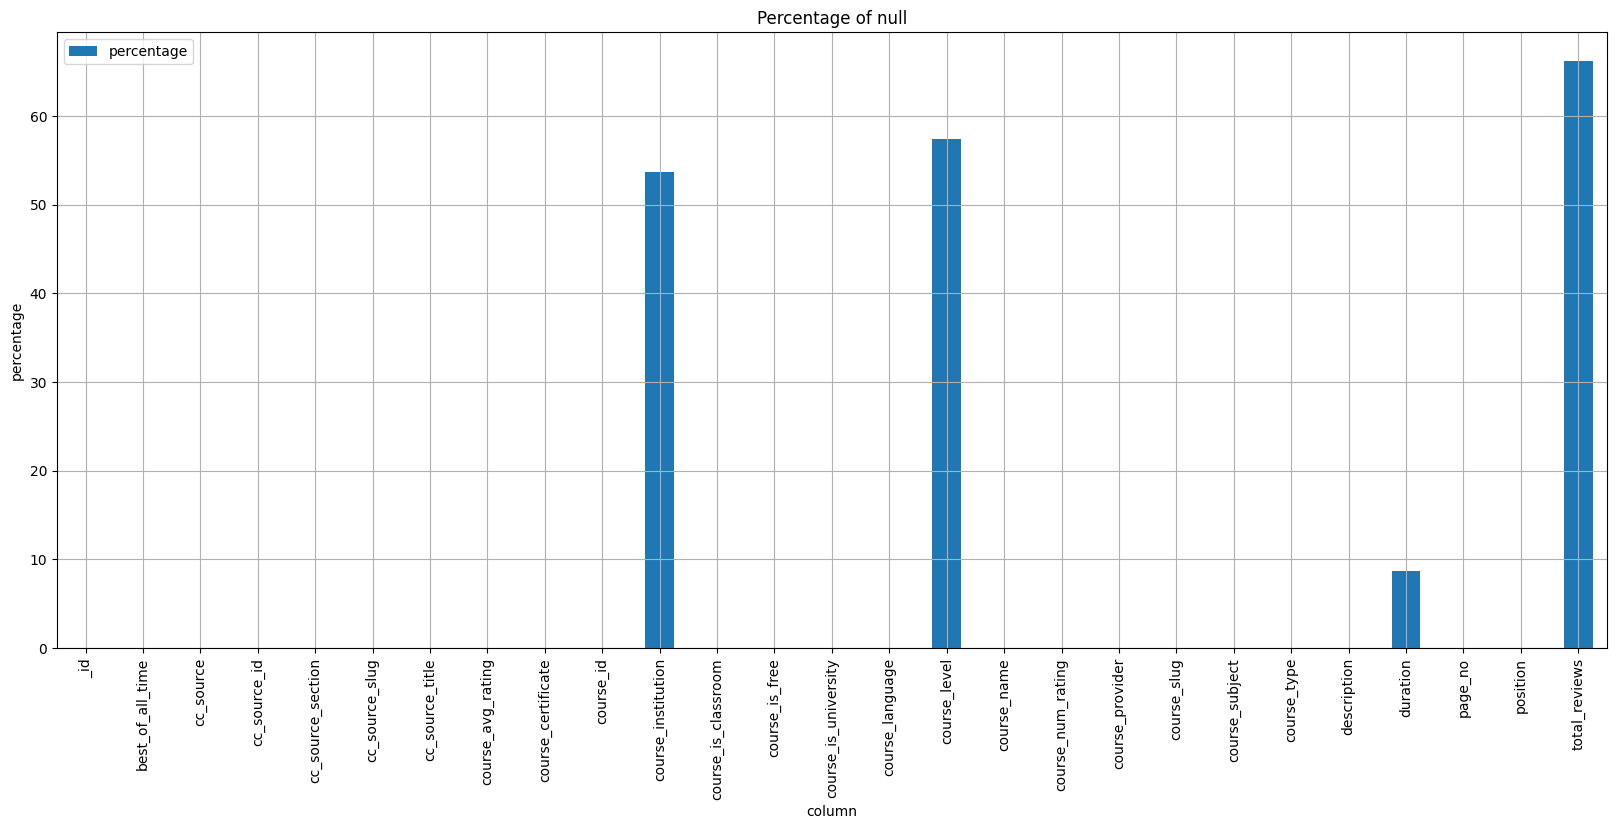

In [70]:
# Identify percentage of null
percentage_null = df.isna().mean().mul(100).to_frame()
percentage_null.rename(columns={0: "percentage"}, errors="raise", inplace=True)

percentage_null.plot.bar(figsize=(20, 8), title="Percentage of null", xlabel="column", ylabel="percentage")
plt.grid()
plt.show()

In [71]:
# List the top 5 courses
df.head()

,_id,best_of_all_time,cc_source,cc_source_id,cc_source_section,cc_source_slug,cc_source_title,course_avg_rating,course_certificate,course_id,...,course_num_rating,course_provider,course_slug,course_subject,course_type,description,duration,page_no,position,total_reviews
0,146290,True,provider,178,catalog_listings,youtube,YouTube,4.60976,False,146290,...,123,YouTube,youtube-chatgpt-prompt-engineering-course,ChatGPT,course,Syllabus: Introduction What will we cover? B...,Less than 1 hour of material,1,1,123 reviews
1,80239,True,provider,178,catalog_listings,youtube,YouTube,4.67500,False,80239,...,120,YouTube,youtube-pharmacology,Pharmacology,course,Learn the basics of Pharmacology to understand...,1-2 hours worth of material,1,2,120 reviews
2,47368,False,provider,178,catalog_listings,youtube,YouTube,4.61538,False,47368,...,117,YouTube,youtube-organic-farming-for-sustainable-agricu...,Agriculture,course,The course is designed to train students on or...,20 hours worth of material,1,3,117 reviews
3,53095,True,provider,178,catalog_listings,youtube,YouTube,4.57391,False,53095,...,115,YouTube,youtube-supply-chain-management,Supply Chain,course,"Learn about Supply Chain Management, Procureme...",1-2 hours worth of material,1,4,115 reviews
4,64206,True,provider,178,catalog_listings,youtube,YouTube,4.71717,False,64206,...,99,YouTube,youtube-fundamentals-of-qualitative-research-m...,Qualitative Research,course,Learn the fundamentals of Qualitative Research...,1-2 hours worth of material,1,5,99 reviews


In [72]:
# List the last 5 courses
df.tail()

,_id,best_of_all_time,cc_source,cc_source_id,cc_source_section,cc_source_slug,cc_source_title,course_avg_rating,course_certificate,course_id,...,course_num_rating,course_provider,course_slug,course_subject,course_type,description,duration,page_no,position,total_reviews
122550,66512,True,provider,187,catalog_listings,the-odin-project,The Odin Project,0.0,False,66512,...,0,The Odin Project,theodinproject-foundations,Web Development,course,This is where it all begins! A hands-on introd...,NaN,1,1,NaN
122551,66513,True,provider,187,catalog_listings,the-odin-project,The Odin Project,0.0,False,66513,...,0,The Odin Project,theodinproject-full-stack-ruby-on-rails,Ruby on Rails,course,This path takes you through our entire Ruby on...,NaN,1,2,NaN
122552,66514,True,provider,187,catalog_listings,the-odin-project,The Odin Project,0.0,False,66514,...,0,The Odin Project,theodinproject-full-stack-javascript,Javascript,course,This path takes you through our entire JavaScr...,NaN,1,3,NaN
122553,119216,True,provider,215,catalog_listings,pentester-academy,PentesterAcademy,0.0,False,119216,...,0,PentesterAcademy,pentesteracademy-reverse-engineering-linux-32-...,Reverse Engineering,course,This course will familiarize students with all...,NaN,1,1,NaN
122554,119214,True,provider,214,catalog_listings,try-hack-me,TryHackMe,0.0,False,119214,...,0,TryHackMe,tryhackme-windows-reversing-intro,Reverse Engineering,course,This room is part of a series of rooms that wi...,NaN,1,1,NaN


In [73]:
df["cc_source_title"].value_counts()

cc_source_title
YouTube                     19995
Udemy                       19995
Coursera                    14590
LinkedIn Learning           11802
Skillshare                   9410
                            ...  
Cisco Networking Academy       10
Jovian                          4
The Odin Project                3
PentesterAcademy                1
TryHackMe                       1
Name: count, Length: 83, dtype: int64

# Wrangling and Cleansing

##### 3. Cleaning data:
remove duplication, remove punctuations, remove numbers in tweets, and remove words with length less than 2.

---

In [74]:
def remove_special_char(value: str) -> str:
    """
    Removes special characters from the given value.

    Args:
        value (str): The string value to remove special characters from.

    Returns:
        str: The value with special characters removed.
    """
    # Remove/replace special chars
    value = str(value)
    value = value.replace(r"\'", "'")
    value = value.replace(r'\xc2\x80', '')
    value = value.replace(r'\xc2\x81', '')
    value = value.replace(r'\xc2\x82', '')
    value = value.replace(r'\xc2\x83', '')
    value = value.replace(r'\xc2\x84', '')
    value = value.replace(r'\xc2\x85', '')
    value = value.replace(r'\xc2\x86', '')
    value = value.replace(r'\xc2\x87', '')
    value = value.replace(r'\xc2\x88', '')
    value = value.replace(r'\xc2\x89', '')
    value = value.replace(r'\xc2\x8a', '')
    value = value.replace(r'\xc2\x8b', '')
    value = value.replace(r'\xc2\x8c', '')
    value = value.replace(r'\xc2\x8d', '')
    value = value.replace(r'\xc2\x8e', '')
    value = value.replace(r'\xc2\x8f', '')
    value = value.replace(r'\xc2\x90', '')
    value = value.replace(r'\xc2\x91', '')
    value = value.replace(r'\xc2\x92', '')
    value = value.replace(r'\xc2\x93', '')
    value = value.replace(r'\xc2\x94', '')
    value = value.replace(r'\xc2\x95', '')
    value = value.replace(r'\xc2\x96', '')
    value = value.replace(r'\xc2\x97', '')
    value = value.replace(r'\xc2\x98', '')
    value = value.replace(r'\xc2\x99', '')
    value = value.replace(r'\xc2\x9a', '')
    value = value.replace(r'\xc2\x9b', '')
    value = value.replace(r'\xc2\x9c', '')
    value = value.replace(r'\xc2\x9d', '')
    value = value.replace(r'\xc2\x9e', '')
    value = value.replace(r'\xc2\x9f', '')
    value = value.replace(r'\xc2\xa0', '')
    value = value.replace(r'\xc2\xa1', '¡')
    value = value.replace(r'\xc2\xa2', '¢')
    value = value.replace(r'\xc2\xa3', '£')
    value = value.replace(r'\xc2\xa4', '¤')
    value = value.replace(r'\xc2\xa5', '¥')
    value = value.replace(r'\xc2\xa6', '¦')
    value = value.replace(r'\xc2\xa7', '§')
    value = value.replace(r'\xc2\xa8', '¨')
    value = value.replace(r'\xc2\xa9', '©')
    value = value.replace(r'\xc2\xaa', 'ª')
    value = value.replace(r'\xc2\xab', '«')
    value = value.replace(r'\xc2\xac', '¬')
    value = value.replace(r'\xc2\xad', '­')
    value = value.replace(r'\xc2\xae', '®')
    value = value.replace(r'\xc2\xaf', '¯')
    value = value.replace(r'\xc2\xb0', '°')
    value = value.replace(r'\xc2\xb1', '±')
    value = value.replace(r'\xc2\xb2', '²')
    value = value.replace(r'\xc2\xb3', '³')
    value = value.replace(r'\xc2\xb4', '´')
    value = value.replace(r'\xc2\xb5', 'µ')
    value = value.replace(r'\xc2\xb6', '¶')
    value = value.replace(r'\xc2\xb7', '·')
    value = value.replace(r'\xc2\xb8', '¸')
    value = value.replace(r'\xc2\xb9', '¹')
    value = value.replace(r'\xc2\xba', 'º')
    value = value.replace(r'\xc2\xbb', '»')
    value = value.replace(r'\xc2\xbc', '¼')
    value = value.replace(r'\xc2\xbd', '½')
    value = value.replace(r'\xc2\xbe', '¾')
    value = value.replace(r'\xc2\xbf', '¿')
    value = value.replace(r'\xc3\x80', 'À')
    value = value.replace(r'\xc3\x81', 'Á')
    value = value.replace(r'\xc3\x82', 'Â')
    value = value.replace(r'\xc3\x83', 'Ã')
    value = value.replace(r'\xc3\x84', 'Ä')
    value = value.replace(r'\xc3\x85', 'Å')
    value = value.replace(r'\xc3\x86', 'Æ')
    value = value.replace(r'\xc3\x87', 'Ç')
    value = value.replace(r'\xc3\x88', 'È')
    value = value.replace(r'\xc3\x89', 'É')
    value = value.replace(r'\xc3\x8a', 'Ê')
    value = value.replace(r'\xc3\x8b', 'Ë')
    value = value.replace(r'\xc3\x8c', 'Ì')
    value = value.replace(r'\xc3\x8d', 'Í')
    value = value.replace(r'\xc3\x8e', 'Î')
    value = value.replace(r'\xc3\x8f', 'Ï')
    value = value.replace(r'\xc3\x90', 'Ð')
    value = value.replace(r'\xc3\x91', 'Ñ')
    value = value.replace(r'\xc3\x92', 'Ò')
    value = value.replace(r'\xc3\x93', 'Ó')
    value = value.replace(r'\xc3\x94', 'Ô')
    value = value.replace(r'\xc3\x95', 'Õ')
    value = value.replace(r'\xc3\x96', 'Ö')
    value = value.replace(r'\xc3\x97', '×')
    value = value.replace(r'\xc3\x98', 'Ø')
    value = value.replace(r'\xc3\x99', 'Ù')
    value = value.replace(r'\xc3\x9a', 'Ú')
    value = value.replace(r'\xc3\x9b', 'Û')
    value = value.replace(r'\xc3\x9c', 'Ü')
    value = value.replace(r'\xc3\x9d', 'Ý')
    value = value.replace(r'\xc3\x9e', 'Þ')
    value = value.replace(r'\xc3\x9f', 'ß')
    value = value.replace(r'\xc3\xa0', 'à')
    value = value.replace(r'\xc3\xa1', 'á')
    value = value.replace(r'\xc3\xa2', 'â')
    value = value.replace(r'\xc3\xa3', 'ã')
    value = value.replace(r'\xc3\xa4', 'ä')
    value = value.replace(r'\xc3\xa5', 'å')
    value = value.replace(r'\xc3\xa6', 'æ')
    value = value.replace(r'\xc3\xa7', 'ç')
    value = value.replace(r'\xc3\xa8', 'è')
    value = value.replace(r'\xc3\xa9', 'é')
    value = value.replace(r'\xc3\xaa', 'ê')
    value = value.replace(r'\xc3\xab', 'ë')
    value = value.replace(r'\xc3\xac', 'ì')
    value = value.replace(r'\xc3\xad', 'í')
    value = value.replace(r'\xc3\xae', 'î')
    value = value.replace(r'\xc3\xaf', 'ï')
    value = value.replace(r'\xc3\xb0', 'ð')
    value = value.replace(r'\xc3\xb1', 'ñ')
    value = value.replace(r'\xc3\xb2', 'ò')
    value = value.replace(r'\xc3\xb3', 'ó')
    value = value.replace(r'\xc3\xb4', 'ô')
    value = value.replace(r'\xc3\xb5', 'õ')
    value = value.replace(r'\xc3\xb6', 'ö')
    value = value.replace(r'\xc3\xb7', '÷')
    value = value.replace(r'\xc3\xb8', 'ø')
    value = value.replace(r'\xc3\xb9', 'ù')
    value = value.replace(r'\xc3\xba', 'ú')
    value = value.replace(r'\xc3\xbb', 'û')
    value = value.replace(r'\xc3\xbc', 'ü')
    value = value.replace(r'\xc3\xbd', 'ý')
    value = value.replace(r'\xc3\xbe', 'þ')
    value = value.replace(r'\xc3\xbf', 'ÿ')
    
    # Remove emojis in byte format
    regrex_pattern = re.compile(pattern = r"[\\]?\\x[a-zA-Z0-9]+(\\x[a-zA-Z0-9]+)?")
    value = regrex_pattern.sub(r'', value).strip()
    
    # Standarize Unicode UTF-8
    value = unicodedata.normalize('NFKD', value).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return value

In [75]:
# Duplicated values
df.duplicated().sum()

0

In [148]:
df["cc_source_title"] = df["cc_source_title"].apply(remove_special_char)
df["course_provider"] = df["course_provider"].apply(remove_special_char)
df["description"] = df["description"].apply(remove_special_char)
df["course_name"] = df["course_name"].apply(remove_special_char)

In [ ]:
def clean_duration(value: str) -> str:
    pass

def classify_reviews_rating(value: str) -> list[str]:
    pass

In [175]:
df[~df["total_reviews"].isna()][["total_reviews"]].to_csv("total_reviews.csv")
# Clean duration
# Total reviews

## EDA (Exploratory Data Analysis)
#### 4. Visualizing data: 
You need to present the daily number of courses for each provider. 

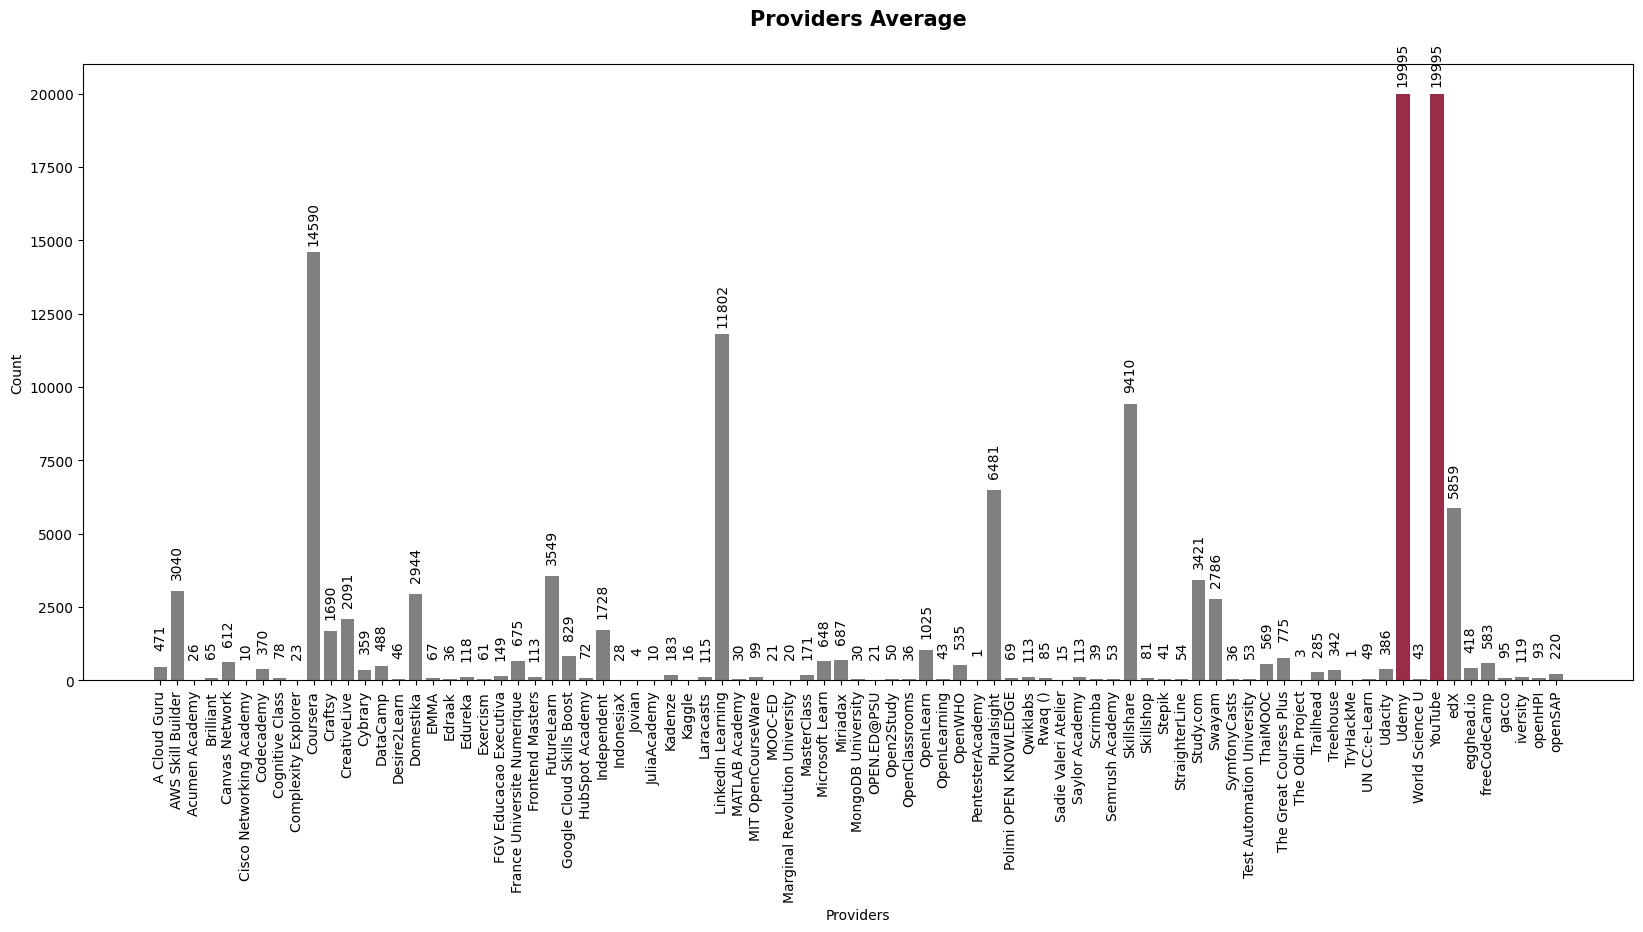

In [149]:
df_providers = df.groupby(by=["course_provider"]).size()

list_colors = ['grey' if s < max(df_providers) else '#9A2B49' for s in df_providers]
plt.figure(figsize=(20, 8))
plt.bar(df_providers.index, df_providers.values, color=list_colors)
plt.xlabel('Providers')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title("Providers Average", fontweight='bold', fontsize='15', y=1.05)
for x, y in zip(df_providers.index, df_providers.values):
    label = "{:}".format(y)
    plt.annotate(label, (x, y+1000), ha='center', va='center', size=10, rotation=90)
plt.show()

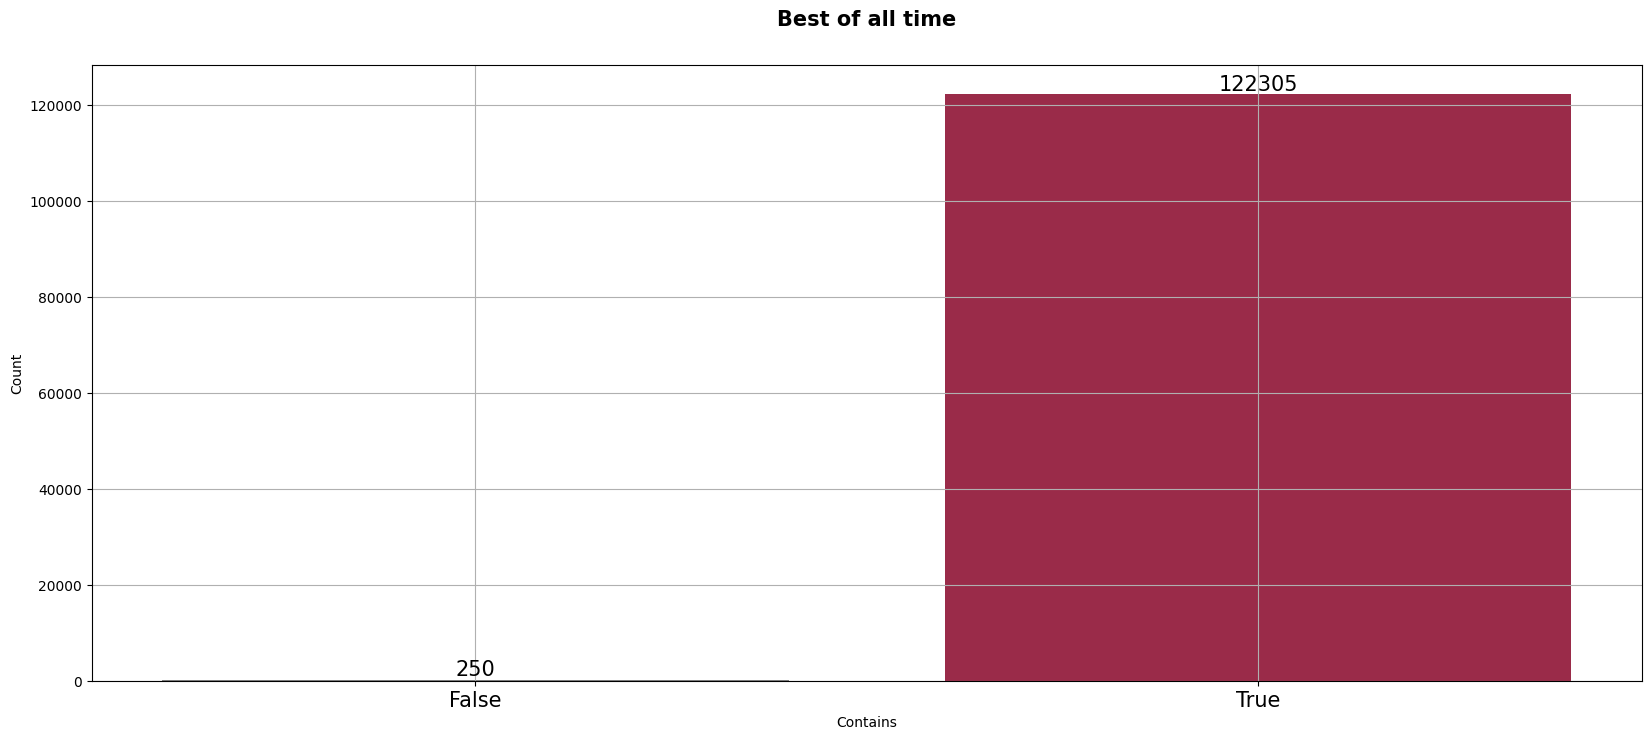

In [95]:
df_best_of_all_time = df.groupby(by=["best_of_all_time"]).size()

list_colors = ['grey' if s < max(df_best_of_all_time) else '#9A2B49' for s in df_best_of_all_time]
plt.figure(figsize=(20, 8))
plt.bar(df_best_of_all_time.index, df_best_of_all_time.values, color=list_colors)
plt.xlabel('Contains')
plt.ylabel('Count')
plt.xticks(np.arange(df_best_of_all_time.nunique()), df_best_of_all_time.index, fontsize='15')
plt.title("Best of all time", fontweight='bold', fontsize='15', y=1.05)
for x, y in zip(df_best_of_all_time.index, df_best_of_all_time.values):
    label = "{:}".format(y)
    plt.annotate(label, (x, y + 2000), ha='center', va='center', size=15)
plt.grid()
plt.show()

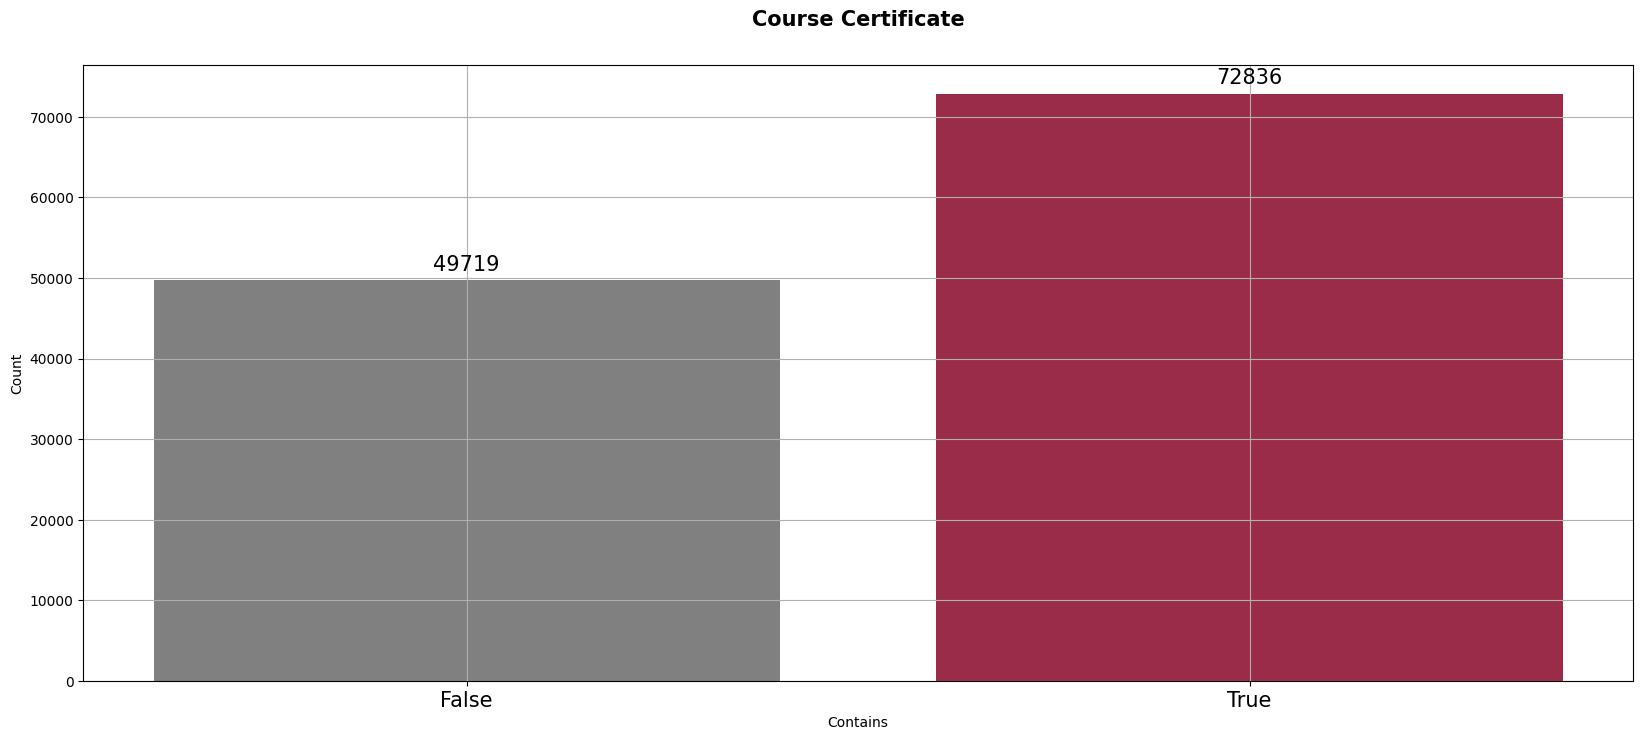

In [94]:
df_course_certificate = df.groupby(by=["course_certificate"]).size()

list_colors = ['grey' if s < max(df_course_certificate) else '#9A2B49' for s in df_course_certificate]
plt.figure(figsize=(20, 8))
plt.bar(df_course_certificate.index, df_course_certificate.values, color=list_colors)
plt.xlabel('Contains')
plt.ylabel('Count')
plt.xticks(np.arange(df_course_certificate.nunique()), df_course_certificate.index, fontsize='15')
plt.title("Course Certificate", fontweight='bold', fontsize='15', y=1.05)
for x, y in zip(df_course_certificate.index, df_course_certificate.values):
    label = "{:}".format(y)
    plt.annotate(label, (x, y + 2000), ha='center', va='center', size=15)
plt.grid()
plt.show()

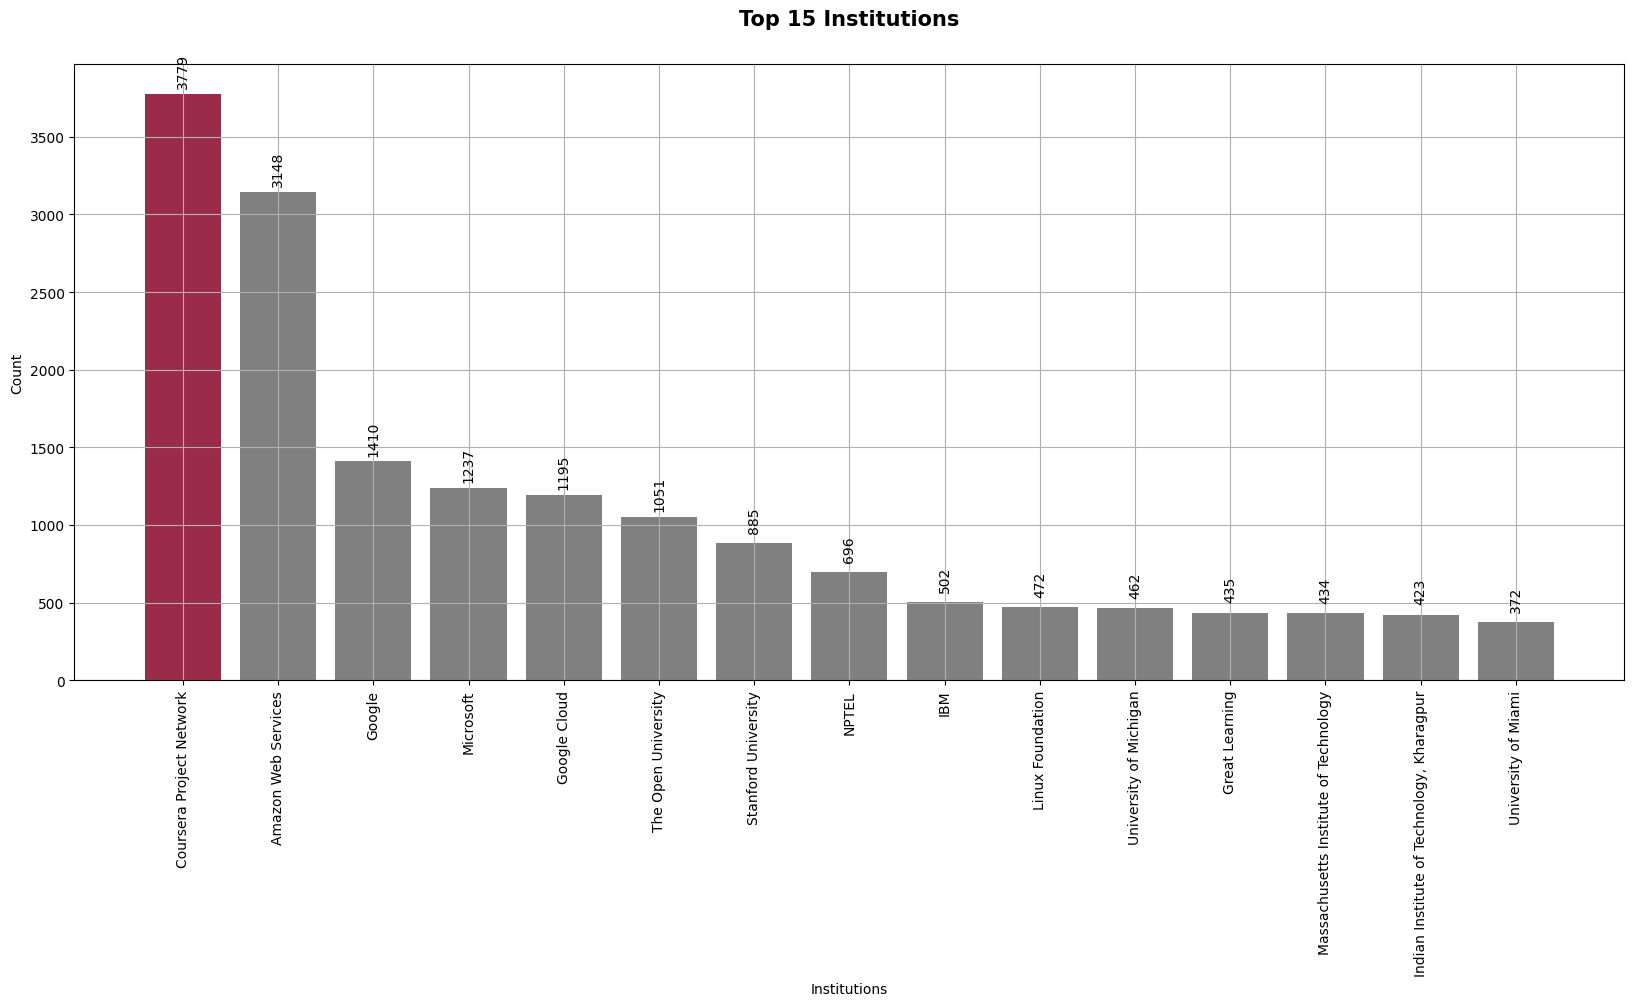

In [115]:
df_course_institution = df.groupby(by=["course_institution"]).size().sort_values(ascending=False).head(15)

list_colors = ['grey' if s < max(df_course_institution) else '#9A2B49' for s in df_course_institution]
plt.figure(figsize=(20, 8))
plt.bar(df_course_institution.index, df_course_institution.values, color=list_colors)
plt.xlabel('Institutions')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title("Top 15 Institutions", fontweight='bold', fontsize='15', y=1.05)
for x, y in zip(df_course_institution.index, df_course_institution.values):
    label = "{:}".format(y)
    plt.annotate(label, (x, y+150), ha='center', va='center', size=10, rotation=90)
plt.grid()
plt.show()

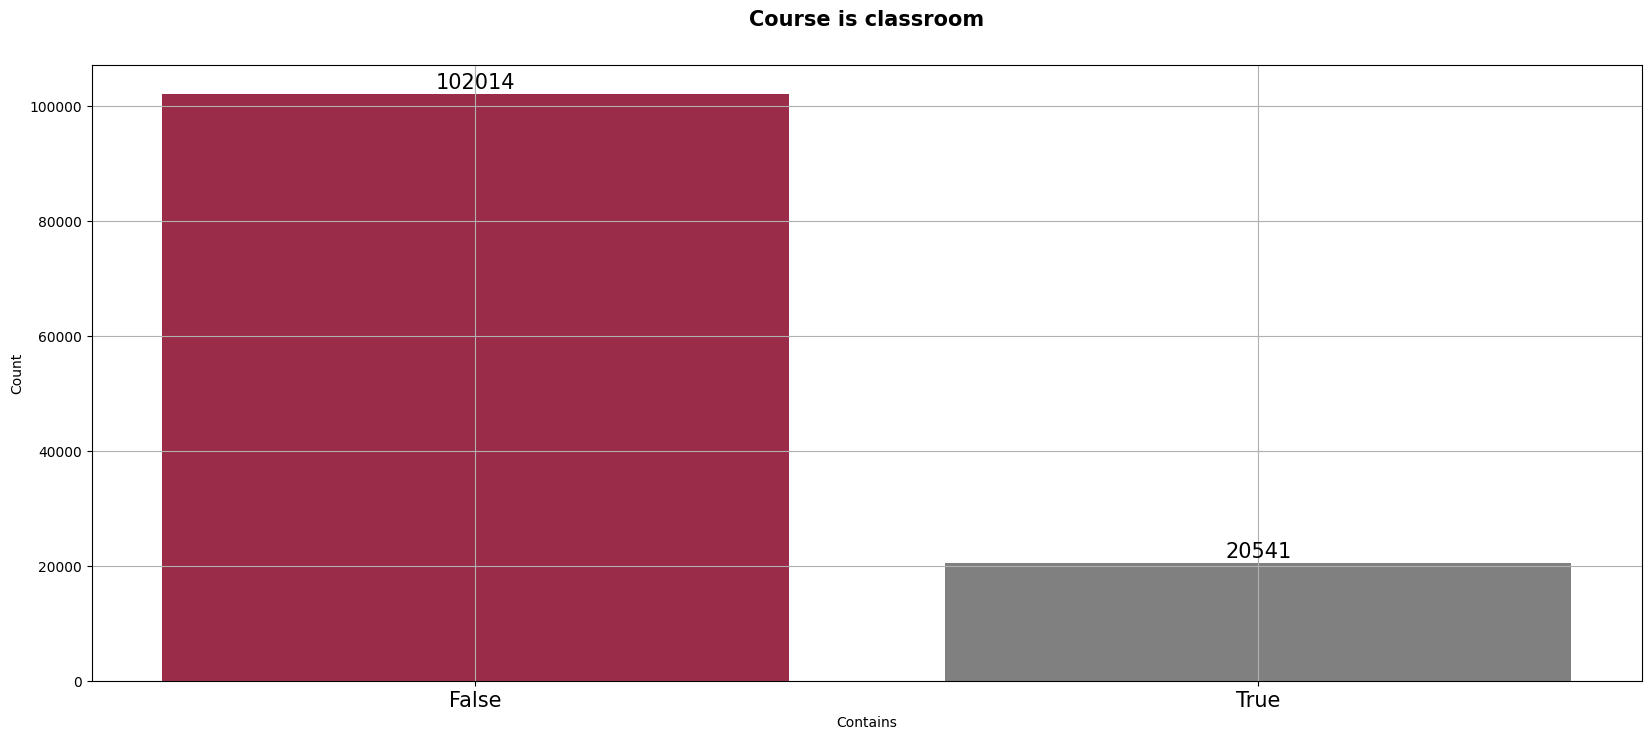

In [117]:
df_course_is_classroom = df.groupby(by=["course_is_classroom"]).size()

list_colors = ['grey' if s < max(df_course_is_classroom) else '#9A2B49' for s in df_course_is_classroom]
plt.figure(figsize=(20, 8))
plt.bar(df_course_is_classroom.index, df_course_is_classroom.values, color=list_colors)
plt.xlabel('Contains')
plt.ylabel('Count')
plt.xticks(np.arange(df_course_is_classroom.nunique()), df_course_is_classroom.index, fontsize='15')
plt.title("Course is classroom", fontweight='bold', fontsize='15', y=1.05)
for x, y in zip(df_course_is_classroom.index, df_course_is_classroom.values):
    label = "{:}".format(y)
    plt.annotate(label, (x, y + 2000), ha='center', va='center', size=15)
plt.grid()
plt.show()

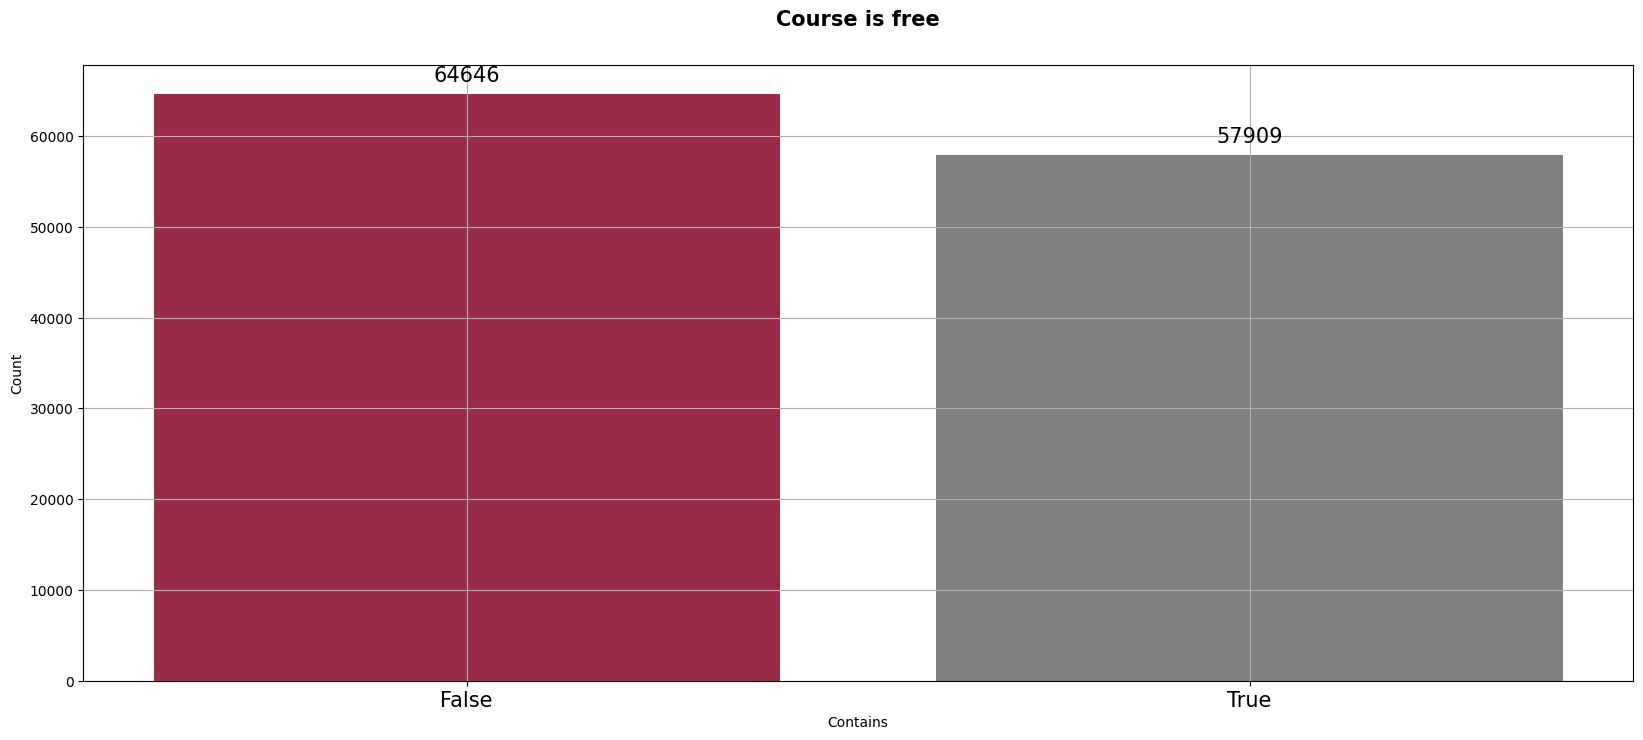

In [119]:
df_course_is_free = df.groupby(by=["course_is_free"]).size()

list_colors = ['grey' if s < max(df_course_is_free) else '#9A2B49' for s in df_course_is_free]
plt.figure(figsize=(20, 8))
plt.bar(df_course_is_free.index, df_course_is_free.values, color=list_colors)
plt.xlabel('Contains')
plt.ylabel('Count')
plt.xticks(np.arange(df_course_is_free.nunique()), df_course_is_free.index, fontsize='15')
plt.title("Course is free", fontweight='bold', fontsize='15', y=1.05)
for x, y in zip(df_course_is_free.index, df_course_is_free.values):
    label = "{:}".format(y)
    plt.annotate(label, (x, y + 2000), ha='center', va='center', size=15)
plt.grid()
plt.show()

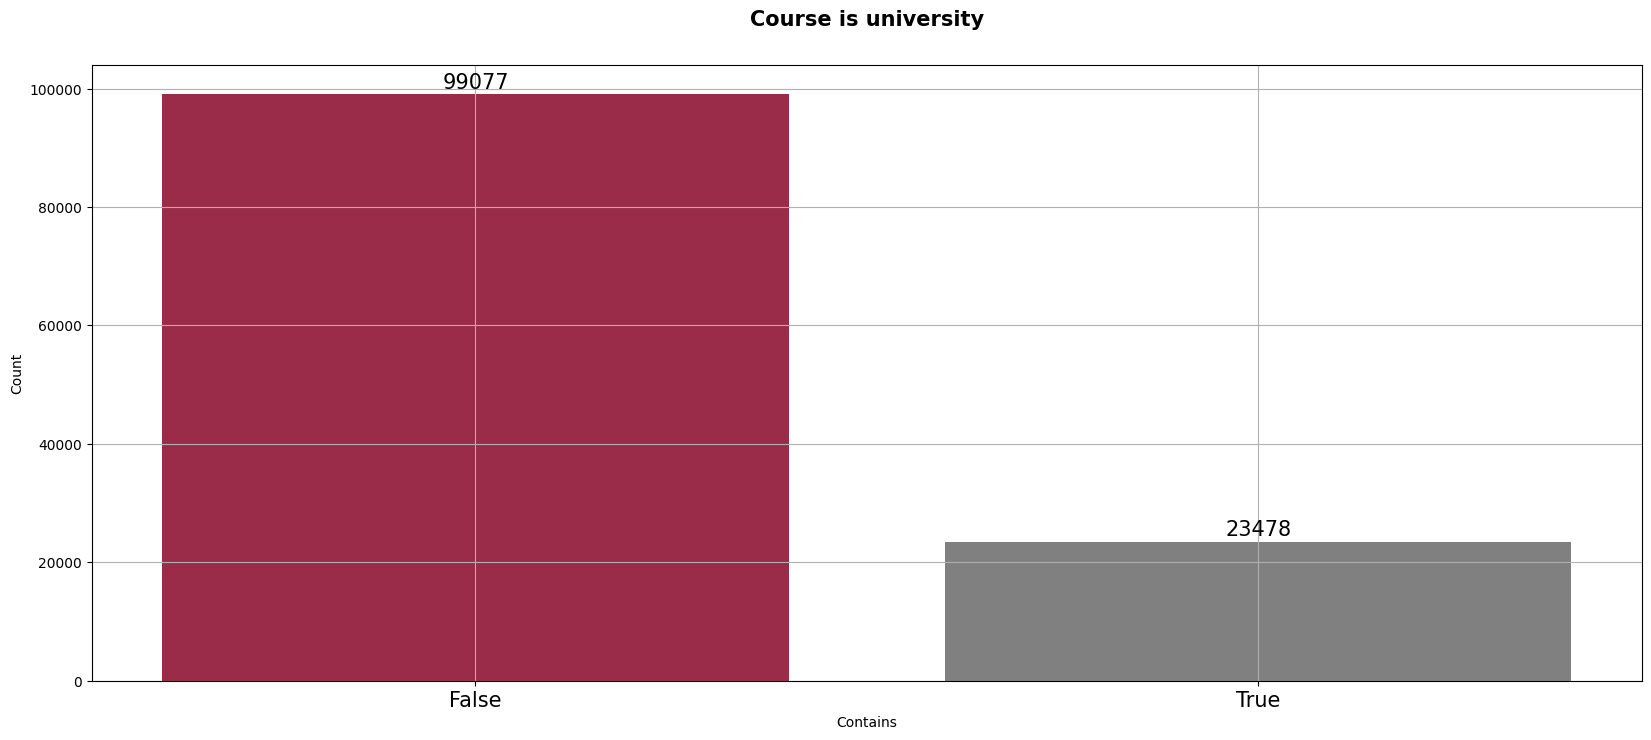

In [121]:
df_course_is_university = df.groupby(by=["course_is_university"]).size()

list_colors = ['grey' if s < max(df_course_is_university) else '#9A2B49' for s in df_course_is_university]
plt.figure(figsize=(20, 8))
plt.bar(df_course_is_university.index, df_course_is_university.values, color=list_colors)
plt.xlabel('Contains')
plt.ylabel('Count')
plt.xticks(np.arange(df_course_is_university.nunique()), df_course_is_university.index, fontsize='15')
plt.title("Course is university", fontweight='bold', fontsize='15', y=1.05)
for x, y in zip(df_course_is_university.index, df_course_is_university.values):
    label = "{:}".format(y)
    plt.annotate(label, (x, y + 2000), ha='center', va='center', size=15)
plt.grid()
plt.show()

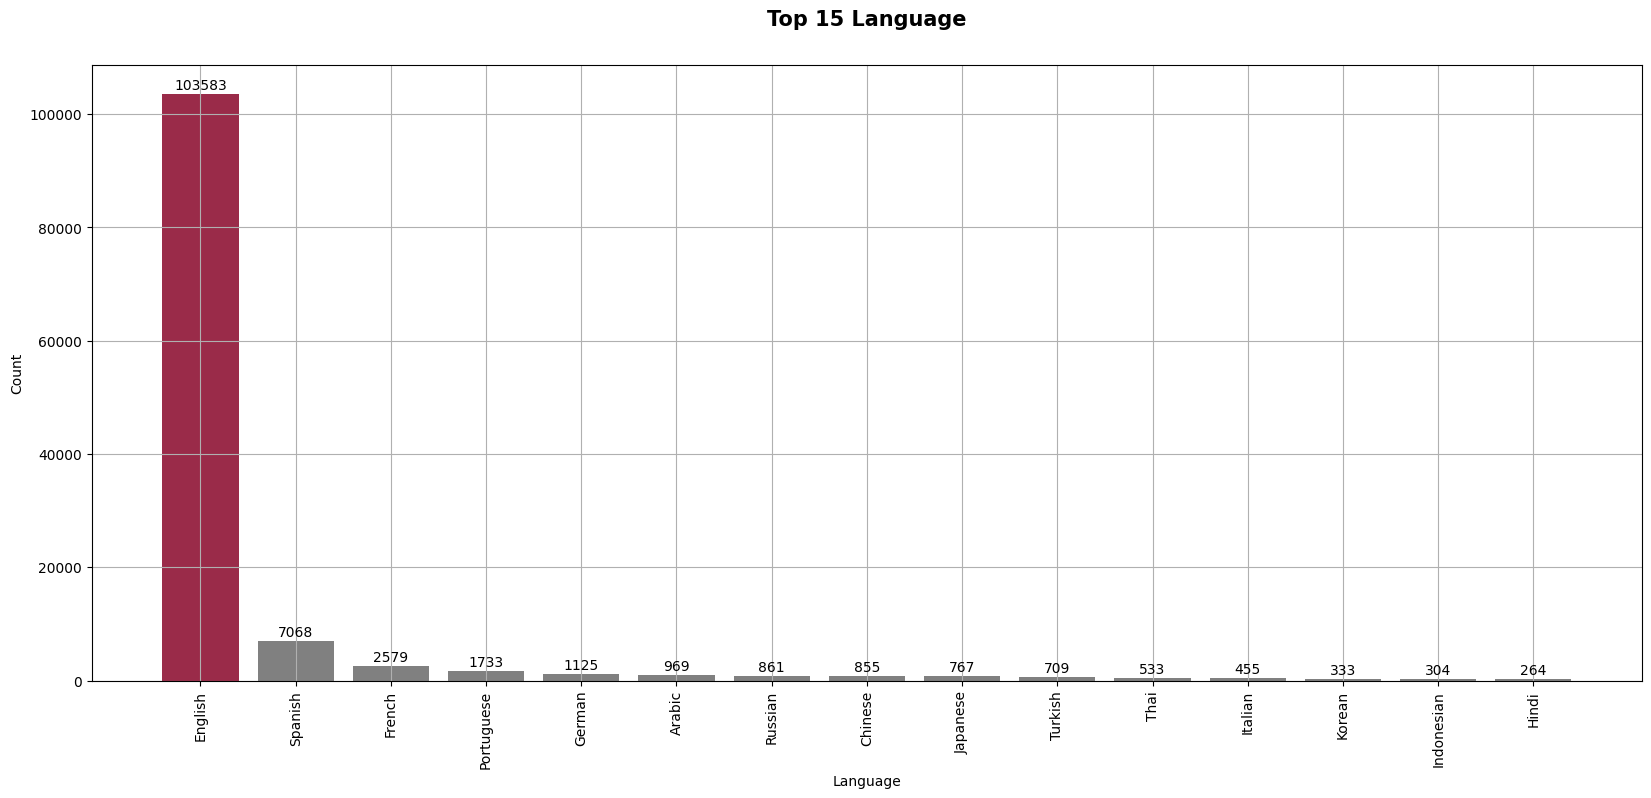

In [130]:
df_course_language = df.groupby(by=["course_language"]).size().sort_values(ascending=False).head(15)

list_colors = ['grey' if s < max(df_course_language) else '#9A2B49' for s in df_course_language]
plt.figure(figsize=(20, 8))
plt.bar(df_course_language.index, df_course_language.values, color=list_colors)
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title("Top 15 Language", fontweight='bold', fontsize='15', y=1.05)
for x, y in zip(df_course_language.index, df_course_language.values):
    label = "{:}".format(y)
    plt.annotate(label, (x, y+1500), ha='center', va='center', size=10)
plt.grid()
plt.show()

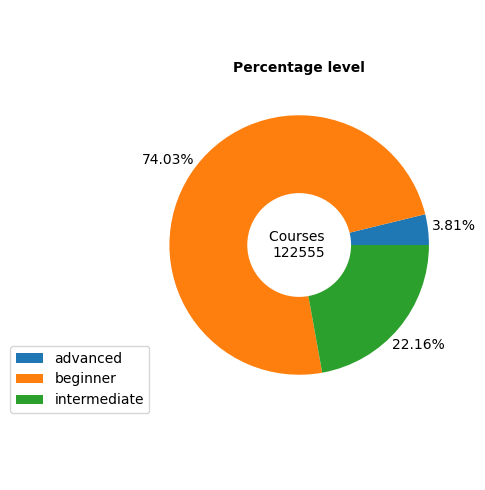

In [143]:
df_course_level = df.groupby(by=["course_level"])["course_level"].count()
total_courses = f"Courses \n{df.shape[0]}"
n_explode = df["course_level"].nunique()
explode = [0.4 if n == 6 else 0 for n in range(n_explode)]

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
pie = ax.pie(
    df_course_level.values,
    explode=explode,
    autopct="%.2f%%",
    pctdistance=1.2,
)
ax.legend(df_course_level.index, bbox_to_anchor=(0, 0.3))
centre_circle = plt.Circle((0, 0), 0.40, fc="white")

fig.gca().add_artist(centre_circle)
plt.title("Percentage level", fontweight='bold', fontsize='10', y=0.85)
ax.text(
    0.0,
    0.0,
    total_courses,
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=10,
)
ax.axis("equal")

for text in pie[1]:
    text.set_horizontalalignment('center')

plt.tight_layout()
plt.show()

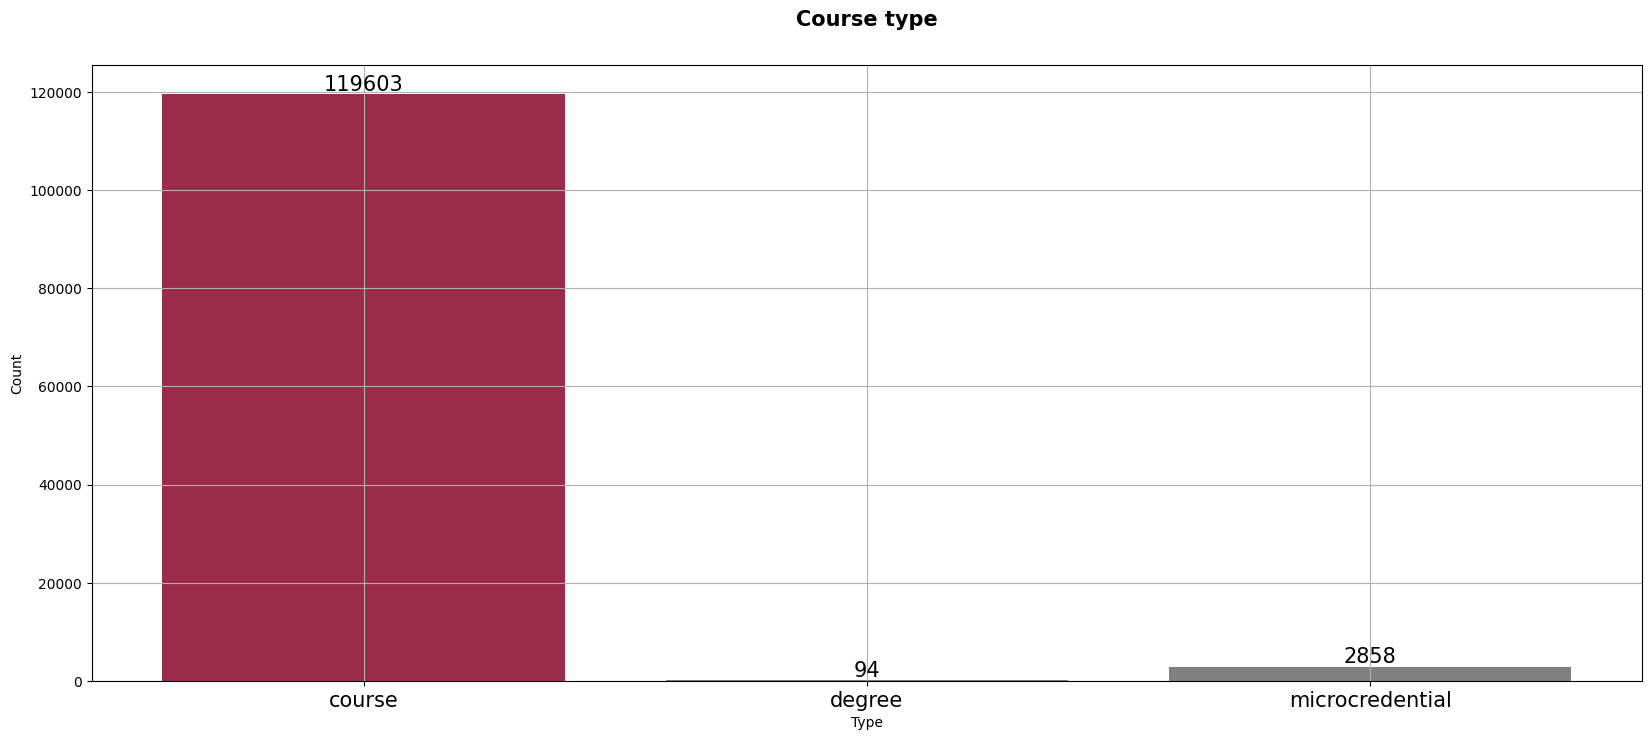

In [153]:
df_course_type = df.groupby(by=["course_type"]).size()

list_colors = ['grey' if s < max(df_course_type) else '#9A2B49' for s in df_course_type]
plt.figure(figsize=(20, 8))
plt.bar(df_course_type.index, df_course_type.values, color=list_colors)
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(np.arange(df_course_type.nunique()), df_course_type.index, fontsize='15')
plt.title("Course type", fontweight='bold', fontsize='15', y=1.05)
for x, y in zip(df_course_type.index, df_course_type.values):
    label = "{:}".format(y)
    plt.annotate(label, (x, y + 2000), ha='center', va='center', size=15)
plt.grid()
plt.show()